In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('onlinefraud.csv.zip')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.shape

(6362620, 11)

what's the features means

step: represents a unit of time where 1 oldbalanceorg equals 1 hour
type: type of online transaction
amount: the amount of the transaction
nameorig: customer starting the transaction
oldbalanceorg: balance before the transaction
newbalanceorig: balance after the transaction
nameDest: recipient of the transaction
oldbalancedest: initial balance of recipient before the transaction
newbalancedest: the new balance of recipient after the transaction
isfraud: fraud transaction

In [6]:
data.iloc[0,:]

step                        1
type                  PAYMENT
amount                9839.64
nameOrig          C1231006815
oldbalanceOrg        170136.0
newbalanceOrig      160296.36
nameDest          M1979787155
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
Name: 0, dtype: object

Data cleaning

In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.duplicated().sum()

0

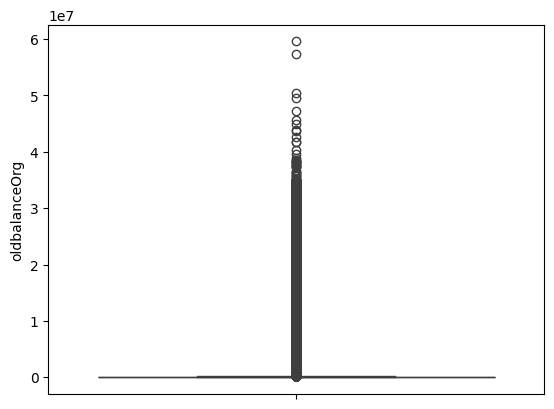

In [9]:
sb.boxplot(data.oldbalanceOrg)
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


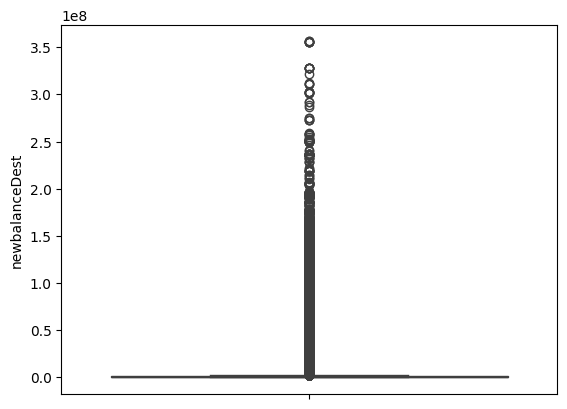

In [11]:
sb.boxplot(data['newbalanceDest'])
plt.show()

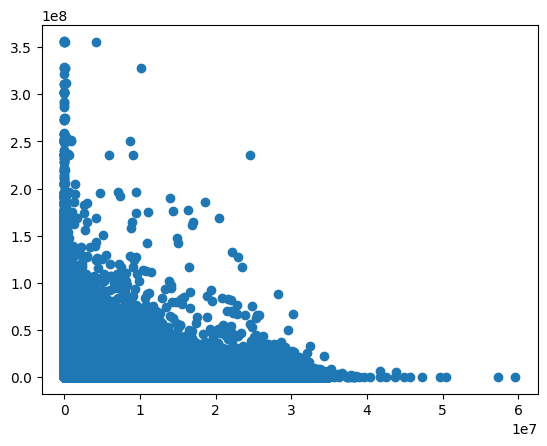

In [12]:
plt.scatter(data.oldbalanceOrg, data.newbalanceDest)
plt.show()

In [13]:
Q1 = np.percentile(data['amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [14]:
IQR


195331.935

In [15]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [16]:
upper = np.where(data['amount'] >= (Q3+1.5*IQR))
lower = np.where(data['amount'] <= (Q1-1.5*IQR))

In [17]:
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

In [18]:
data.step

0            1
1            1
2            1
3            1
4            1
          ... 
6362609    742
6362610    742
6362611    742
6362614    743
6362615    743
Name: step, Length: 6024543, dtype: int64

Explortary data analysis

In [19]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
data.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362609    CASH_OUT
6362610    TRANSFER
6362611    CASH_OUT
6362614    TRANSFER
6362615    CASH_OUT
Name: type, Length: 6024543, dtype: object

In [21]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [22]:
data.type.value_counts()

type
CASH_OUT    2185250
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: count, dtype: int64

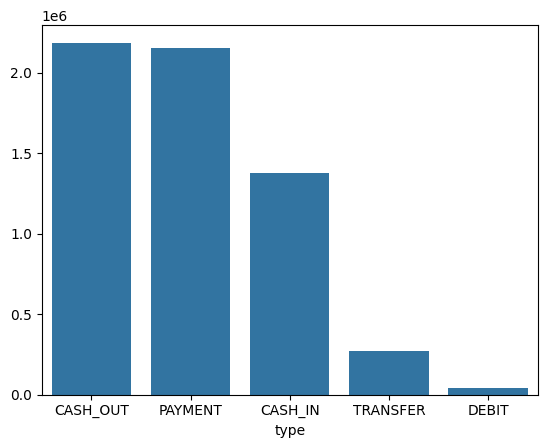

In [23]:
sb.barplot(x = data.type.value_counts().index, y = data.type.value_counts().values)
plt.show()

it looks like that cash out takes the most of the data and then payment so we can conclude that the most of fraud will b e in this two types

In [24]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06,6.024543e+06
mean,2.433126e+02,1.115342e+05,8.619578e+05,8.859128e+05,9.871264e+05,1.037883e+06,7.235404e-04,3.319754e-07
std,1.422881e+02,1.203984e+05,2.933836e+06,2.969976e+06,3.031559e+06,3.055336e+06,2.688897e-02,5.761730e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.236855e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,6.317584e+04,1.514600e+04,0.000000e+00,1.027301e+05,1.683203e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.829338e+05,1.134380e+05,1.602874e+05,8.249873e+05,9.251457e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,5.017194e+05,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [25]:
data.amount

0            9839.64
1            1864.28
2             181.00
3             181.00
4           11668.14
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: amount, Length: 6024543, dtype: float64

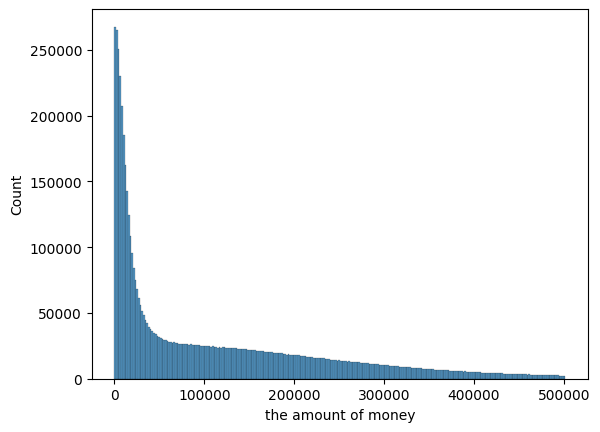

In [26]:
sb.histplot(data.amount)
plt.xlabel('the amount of money')
plt.show()

let's see the most 10 largest amount

In [27]:
data.nlargest(10, 'amount')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1675737,159,CASH_OUT,501719.38,C1970677139,18653.00,0.00,C1619270798,235419.03,737138.41,0,0
1737199,161,CASH_OUT,501718.41,C1077569708,78605.00,0.00,C1924590813,697311.14,1199029.56,0,0
1082806,129,CASH_IN,501718.02,C970634468,20873140.30,21374858.32,C1091756447,5463193.08,5127569.29,0,0
2827303,226,CASH_OUT,501717.55,C855812747,121947.70,0.00,C914557298,1379104.08,1880821.63,0,0
2069077,181,CASH_IN,501717.33,C897630635,5120317.65,5622034.98,C1830915224,1314756.05,813038.72,0,0
5280111,372,CASH_OUT,501715.41,C555809067,96128.79,0.00,C1185830080,664493.22,1166208.64,0,0
2984534,231,CASH_IN,501715.19,C1586580516,4122.00,505837.19,C1796738748,0.00,0.00,0,0
1638216,157,CASH_IN,501710.64,C843040970,430.00,502140.64,C1864097021,0.00,0.00,0,0
2025441,180,CASH_IN,501710.41,C1109167155,14682491.62,15184202.03,C145739790,6008879.39,5507168.98,0,0
823098,41,TRANSFER,501709.63,C585977042,9846.00,0.00,C876306094,5932706.69,6434416.32,0,0


In [28]:
x = data.nlargest(10, 'amount').type
  
def unique(li):
    value_counts = []
    for i in li:
        c = li.count(i)
        value_counts.append((i,c))
    return value_counts

In [29]:
x

1675737    CASH_OUT
1737199    CASH_OUT
1082806     CASH_IN
2827303    CASH_OUT
2069077     CASH_IN
5280111    CASH_OUT
2984534     CASH_IN
1638216     CASH_IN
2025441     CASH_IN
823098     TRANSFER
Name: type, dtype: object

In [30]:
from collections import Counter
Counter(x)

Counter({'CASH_IN': 5, 'CASH_OUT': 4, 'TRANSFER': 1})

In [31]:
data.nlargest(10, 'amount').isFraud

1675737    0
1737199    0
1082806    0
2827303    0
2069077    0
5280111    0
2984534    0
1638216    0
2025441    0
823098     0
Name: isFraud, dtype: int64

the largest 10 amount of money are in usual in cash in and cash out transactions and mostly safed

In [32]:
Counter(data.nlargest(100, 'amount').type)

Counter({'CASH_OUT': 45, 'TRANSFER': 33, 'CASH_IN': 22})

in the largest 100 amount the cash out become the largest and transfer more than cash in let's see the fraud count

In [33]:
x = data.nlargest(100, 'amount').isFraud
counter = 0
if 1 in x.values:
    counter +=1
counter

0

in the largets 100 amount of money it's safe and from that we can conclude that the largest amount of money the transaction nearly has more security than small amounts of money

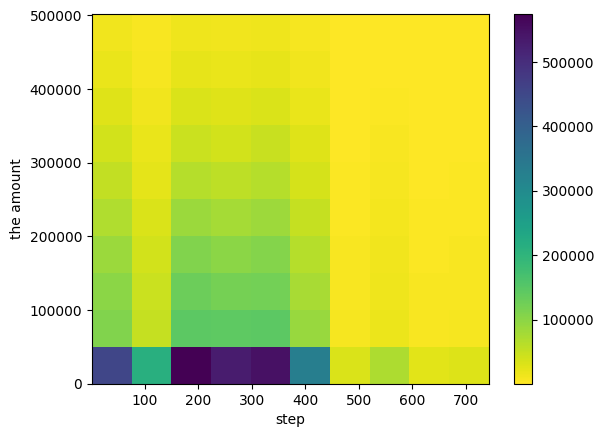

In [34]:
plt.hist2d(data= data, x = 'step', y = 'amount', cmin = 0.5,
    cmap = 'viridis_r' )
plt.colorbar()
plt.xlabel('step')
plt.ylabel('the amount')
plt.show()

the largest amount between 200 aqnd 300 steps

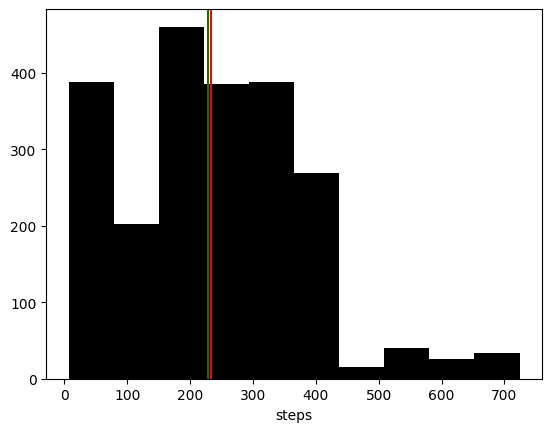

In [35]:
step_amount_avg = data[data.amount >= 500000]['step']
plt.hist(step_amount_avg, color = 'black')
plt.axvline(step_amount_avg.mean(), color = 'red')
plt.axvline(step_amount_avg.median(), color = 'green')
plt.xlabel('steps')
plt.show()

the greater than or equal 500000 $ amount in the steps between 200 and 250 also we n oticed that the data is right skewed which mean > median but in small difference and it tend to be normal distribution let's see the confidence interval

In [36]:
import scipy.stats as st
st.t.interval(confidence=0.90, df=len(step_amount_avg)-1,
              loc=np.mean(step_amount_avg),
              scale=st.sem(step_amount_avg))

(227.86889758368235, 237.97885955270186)

according to the Confidence Interval the most of mthe data points will be nearly between 228 and 238

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6024543 entries, 0 to 6362615
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 551.6+ MB


In [38]:
print(f'the number of unique values of nameOrig is : {round((len(data.nameOrig.unique()) * 100) / data.shape[0], 2)} %')

the number of unique values of nameOrig is : 99.86 %


the nameOrig we can say it's id of the clients

In [39]:
data[data.nameOrig == 'C1065307291']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
361126,17,PAYMENT,5530.99,C1065307291,819637.87,814106.88,M1175397032,0.0,0.0,0,0
1799163,162,CASH_IN,88230.47,C1065307291,38128.00,126358.47,C1154752493,0.0,0.0,0,0
4829222,347,PAYMENT,19717.82,C1065307291,0.00,0.00,M2131079968,0.0,0.0,0,0


In [40]:
Messi = data.nameOrig.mode()

In [41]:
original_name = []
for i in Messi.values:
    original_name.append((i,data[data.nameOrig == i].shape[0]))
for j in original_name:
    print(j)

('C1065307291', 3)
('C1462946854', 3)
('C1530544995', 3)
('C1677795071', 3)
('C1784010646', 3)
('C1832548028', 3)
('C1902386530', 3)
('C1976208114', 3)
('C1999539787', 3)
('C2051359467', 3)
('C2098525306', 3)
('C363736674', 3)
('C400299098', 3)
('C724452879', 3)


the duplicate customers are frequented 3 times for all duplicates

let's rename it to client id

In [42]:
data.nameOrig = data.nameOrig.str.replace('C','').astype('int')
data.rename(columns = {'nameOrig': 'client_id'}, inplace = True)

In [43]:
data.client_id

0          1231006815
1          1666544295
2          1305486145
3           840083671
4          2048537720
              ...    
6362609    1113162093
6362610     778071008
6362611     994950684
6362614    2013999242
6362615     786484425
Name: client_id, Length: 6024543, dtype: int32

The Balance before transaction

In [44]:
data.oldbalanceOrg

0          170136.00
1           21249.00
2             181.00
3             181.00
4           41554.00
             ...    
6362609    258355.42
6362610     63416.99
6362611     63416.99
6362614    339682.13
6362615    339682.13
Name: oldbalanceOrg, Length: 6024543, dtype: float64

In [45]:
data.oldbalanceOrg.describe()

count    6.024543e+06
mean     8.619578e+05
std      2.933836e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.514600e+04
75%      1.134380e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

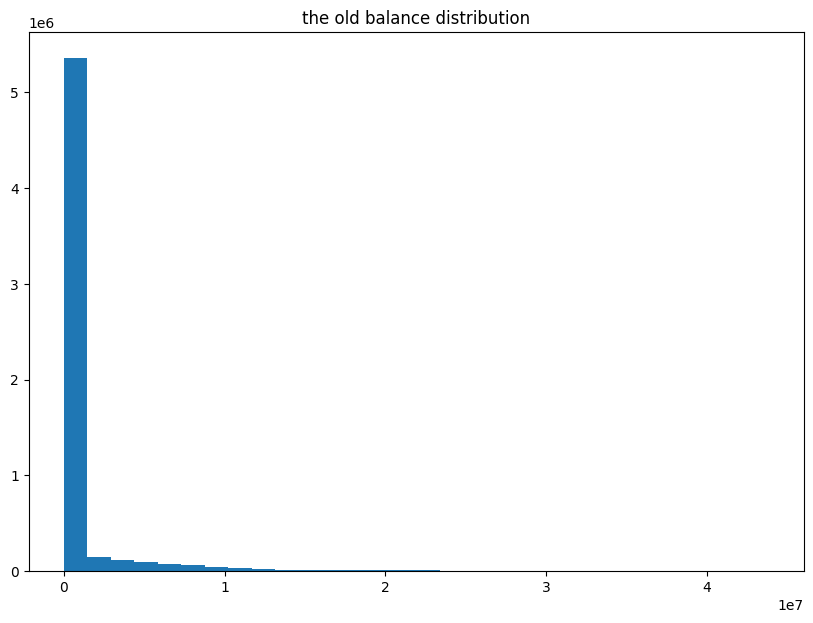

In [46]:
plt.figure(figsize = [10,7])
plt.hist(data.oldbalanceOrg, bins = 30)
plt.title('the old balance distribution')
plt.show()

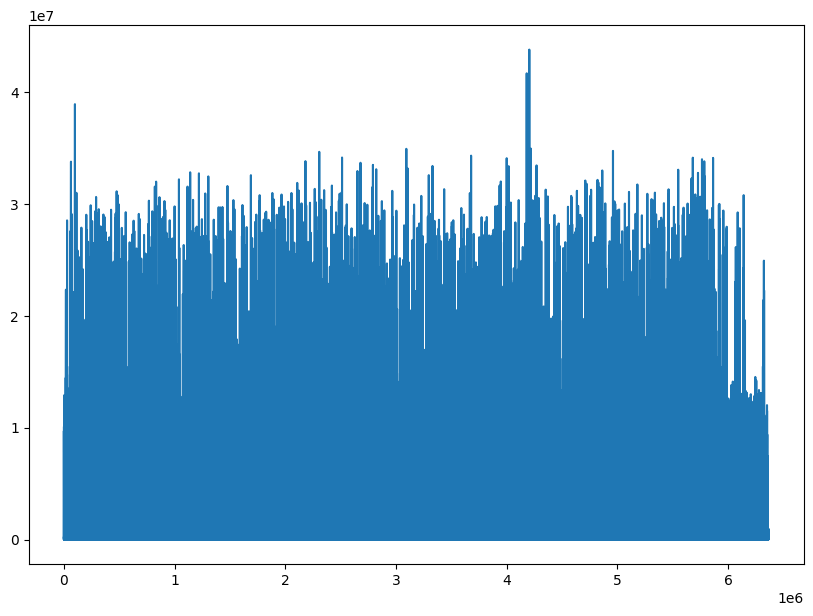

In [47]:
plt.figure(figsize = [10,7])
plt.plot(data.oldbalanceOrg)
plt.show()

In [48]:
data.nlargest(20, 'oldbalanceOrg')

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4203639,305,CASH_OUT,132238.97,559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0
4180200,304,PAYMENT,8301.85,1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
100307,10,CASH_IN,6808.99,1841909664,38939424.03,38946233.02,C734236179,97006.33,90197.34,0,0
100306,10,CASH_IN,376022.62,1450387949,38563401.41,38939424.03,C1050374066,1812980.49,1720832.30,0,0
100305,10,CASH_IN,121569.82,1576842193,38441831.60,38563401.41,C1283626649,304887.13,263945.32,0,0
100304,10,CASH_IN,77083.57,1040382471,38364748.02,38441831.60,C1940815076,180735.97,103652.40,0,0
100303,10,CASH_IN,105150.78,1273896430,38259597.25,38364748.02,C1142840636,545669.97,25148.24,0,0
100302,10,CASH_IN,92897.18,1319675286,38166700.07,38259597.25,C734480558,98196.34,5299.16,0,0


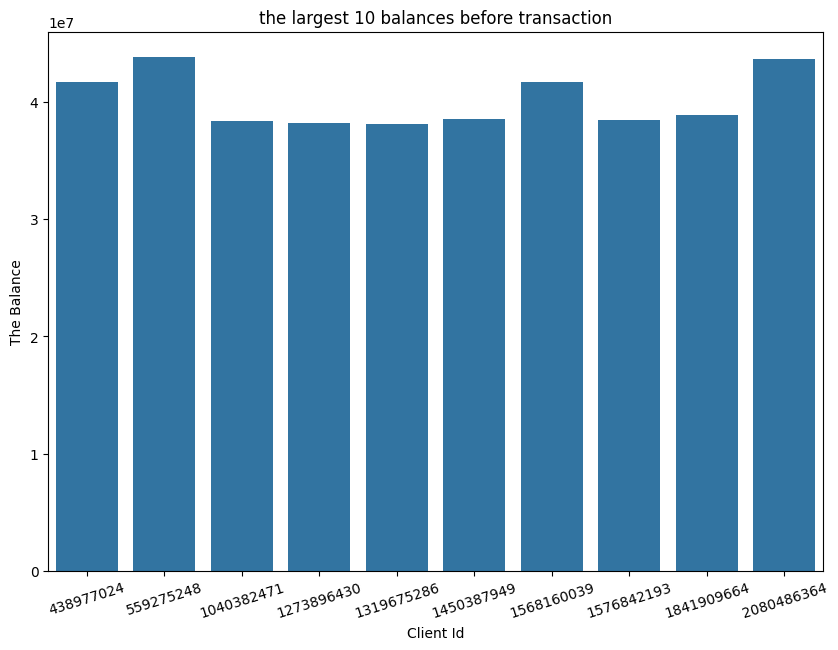

In [49]:
plt.figure(figsize = [10,7])
sb.barplot(x = data.nlargest(10, 'oldbalanceOrg').client_id, y = data.nlargest(10, 'oldbalanceOrg').oldbalanceOrg)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances before transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()

let's see the balance after the transaction

In [50]:
data.newbalanceOrig

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362609         0.00
6362610         0.00
6362611         0.00
6362614         0.00
6362615         0.00
Name: newbalanceOrig, Length: 6024543, dtype: float64

In [51]:
data.newbalanceOrig.describe()

count    6.024543e+06
mean     8.859128e+05
std      2.969976e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.602874e+05
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

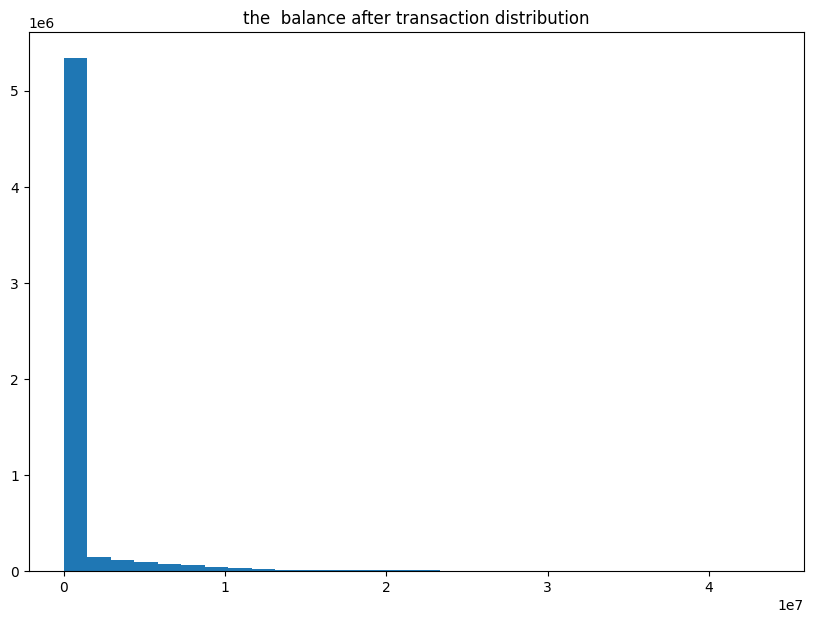

In [52]:
plt.figure(figsize = [10,7])
plt.hist(data.newbalanceOrig, bins = 30)
plt.title('the  balance after transaction distribution')
plt.show()

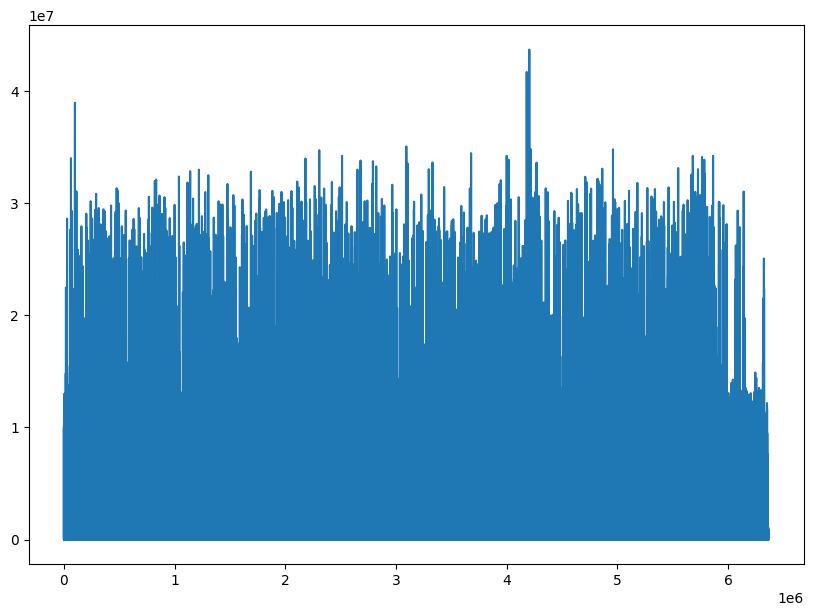

In [53]:
plt.figure(figsize = [10,7])
plt.plot(data.newbalanceOrig)
plt.show()

In [54]:
data.nlargest(20, 'newbalanceOrig')

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4203639,305,CASH_OUT,132238.97,559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0
4180200,304,PAYMENT,8301.85,1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
100307,10,CASH_IN,6808.99,1841909664,38939424.03,38946233.02,C734236179,97006.33,90197.34,0,0
100306,10,CASH_IN,376022.62,1450387949,38563401.41,38939424.03,C1050374066,1812980.49,1720832.30,0,0
100305,10,CASH_IN,121569.82,1576842193,38441831.60,38563401.41,C1283626649,304887.13,263945.32,0,0
100304,10,CASH_IN,77083.57,1040382471,38364748.02,38441831.60,C1940815076,180735.97,103652.40,0,0
100303,10,CASH_IN,105150.78,1273896430,38259597.25,38364748.02,C1142840636,545669.97,25148.24,0,0
100302,10,CASH_IN,92897.18,1319675286,38166700.07,38259597.25,C734480558,98196.34,5299.16,0,0


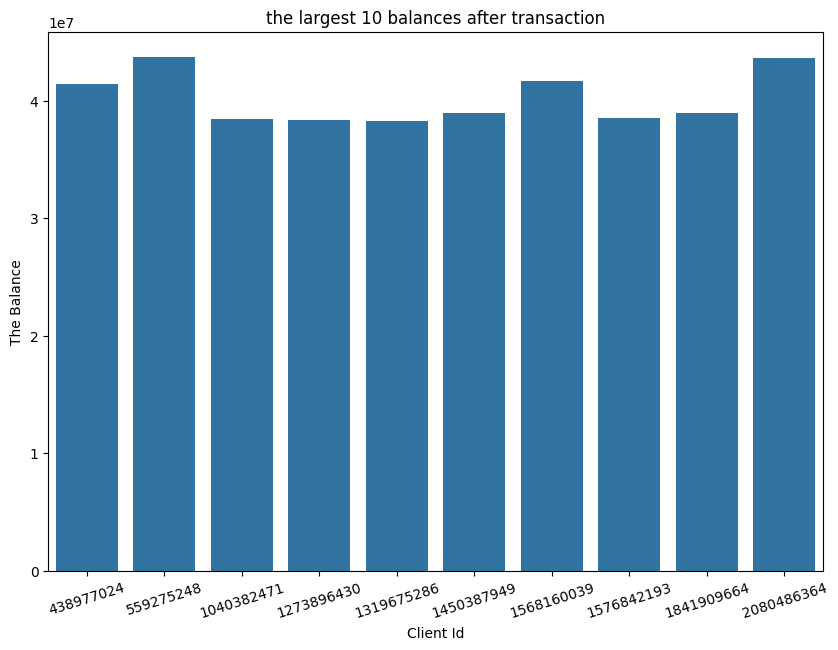

In [55]:
plt.figure(figsize = [10,7])
sb.barplot(x = data.nlargest(10, 'newbalanceOrig').client_id, y = data.nlargest(10, 'newbalanceOrig').newbalanceOrig)
plt.xticks(rotation = 17.5)
plt.title('the largest 10 balances after transaction')
plt.xlabel('Client Id')
plt.ylabel('The Balance')
plt.show()

for the largest 10 clients we don't see any change in the balance between the before and after transaction so now I will going to see the difference between the two ranges

In [56]:
 num_of_samples = 10 / data.shape[0]

In [57]:
data.shape[0]

6024543

In [58]:
samp1 = data.sample(n = 600000)

In [59]:
samp1

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3922999,285,PAYMENT,547.05,1570563352,100599.00,100051.95,M312409501,0.00,0.00,0,0
1241377,134,CASH_IN,174703.71,2012254010,1152719.02,1327422.74,C1137037819,1081873.05,907169.34,0,0
1071941,129,CASH_IN,196743.70,189174319,99296.00,296039.70,C821326154,0.00,0.00,0,0
1376962,138,CASH_OUT,173928.01,464476895,45469.00,0.00,C536153315,382317.94,665952.30,0,0
2767757,213,CASH_OUT,296208.98,805901152,0.00,0.00,C938626917,1535396.96,1831605.94,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3821879,282,CASH_OUT,20627.56,624764039,0.00,0.00,C1675716111,403679.38,424306.94,0,0
5603304,394,CASH_IN,24139.52,863153134,4058.00,28197.52,C1276260790,0.00,0.00,0,0
4919778,350,PAYMENT,34363.62,1381886486,39088.00,4724.38,M1233046696,0.00,0.00,0,0
4995831,352,PAYMENT,38564.55,508213377,0.00,0.00,M439938671,0.00,0.00,0,0


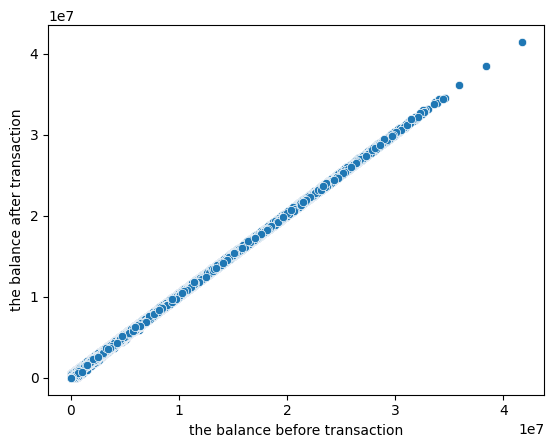

In [63]:
sb.scatterplot(x = samp1.oldbalanceOrg, y = samp1.newbalanceOrig)
plt.xlabel('the balance before transaction')
plt.ylabel('the balance after transaction')
plt.show()

In [64]:
data[['oldbalanceOrg', 'newbalanceOrig']].corr()

,oldbalanceOrg,newbalanceOrig
oldbalanceOrg,1.000000,0.999514
newbalanceOrig,0.999514,1.000000


the sampling distribution shows an strong positive correlation between the balance between the balance before transaction and balance after transaction and that's mean The higher the account balance => the higher the transfer balance

let's see the difference between the old and new balances in order to show the rate of change between them

In [65]:
data['balance_diff'] = data.oldbalanceOrg - data.newbalanceOrig

In [66]:
data.balance_diff.describe()

count    6.024543e+06
mean    -2.395505e+04
std      9.888992e+04
min     -5.017180e+05
25%      0.000000e+00
50%      0.000000e+00
75%      9.776675e+03
max      5.016732e+05
Name: balance_diff, dtype: float64

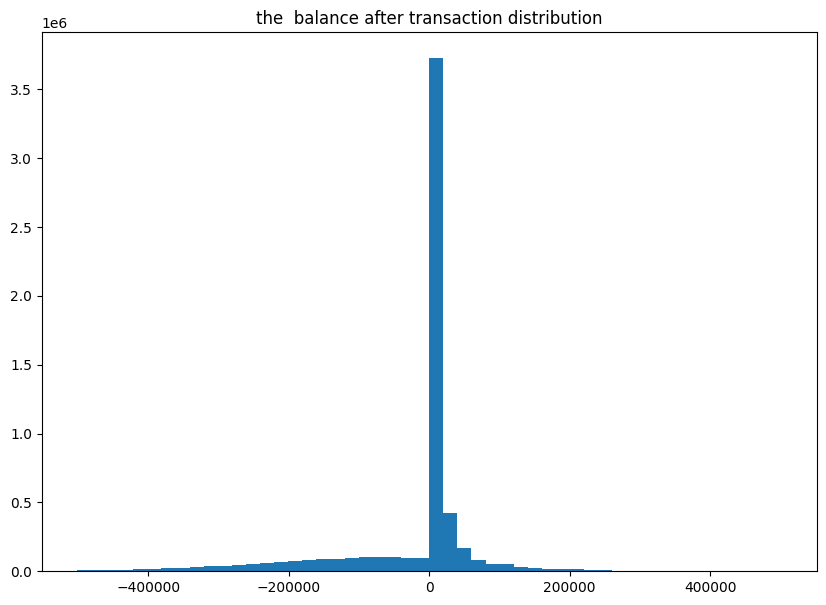

In [67]:
plt.figure(figsize = [10,7])
plt.hist(data.balance_diff, bins=50)
plt.title('the  balance after transaction distribution')
plt.show()

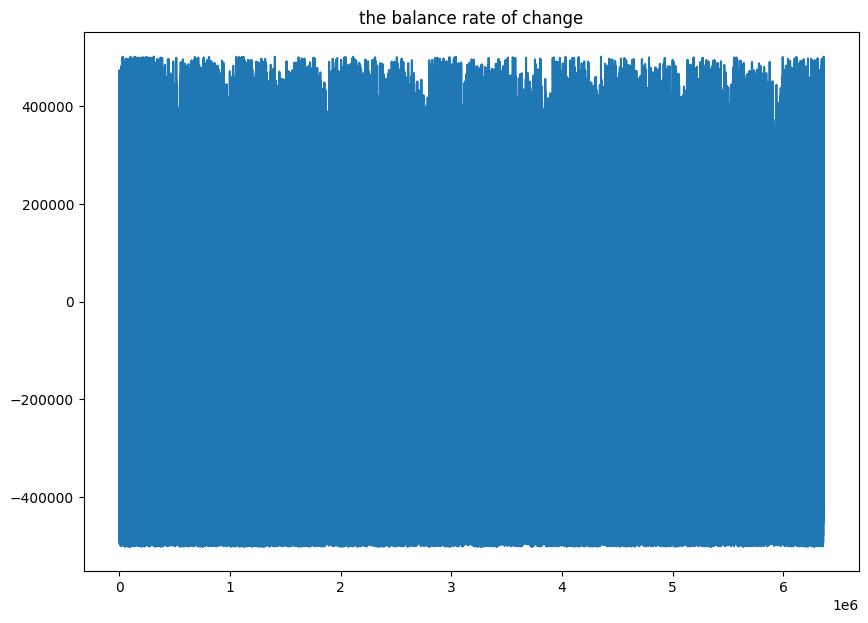

In [68]:
plt.figure(figsize=[10,7])
plt.plot(data.balance_diff)
plt.title('the balance rate of change')
plt.show()

In [69]:
# import plotly.express as px
# fig = px.ecdf(data, x="balance_diff", title = 'the balance rate of change')
# fig.show()

In [70]:
data.head()

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14


let's see the nameDest which is the id of the distination client

In [71]:
data.nameDest.describe()

count         6024543
unique        2716238
top       C1286084959
freq               91
Name: nameDest, dtype: object

In [72]:
data.nameDest.mode()

0    C1286084959
Name: nameDest, dtype: object

In [73]:
# get top 10 most frequent client distination id
n = 10
data['nameDest'].value_counts()[:n]

nameDest
C1286084959    91
C985934102     87
C977993101     86
C2083562754    86
C1360767589    82
C1590550415    82
C392292416     81
C248609774     81
C1789550256    81
C451111351     80
Name: count, dtype: int64

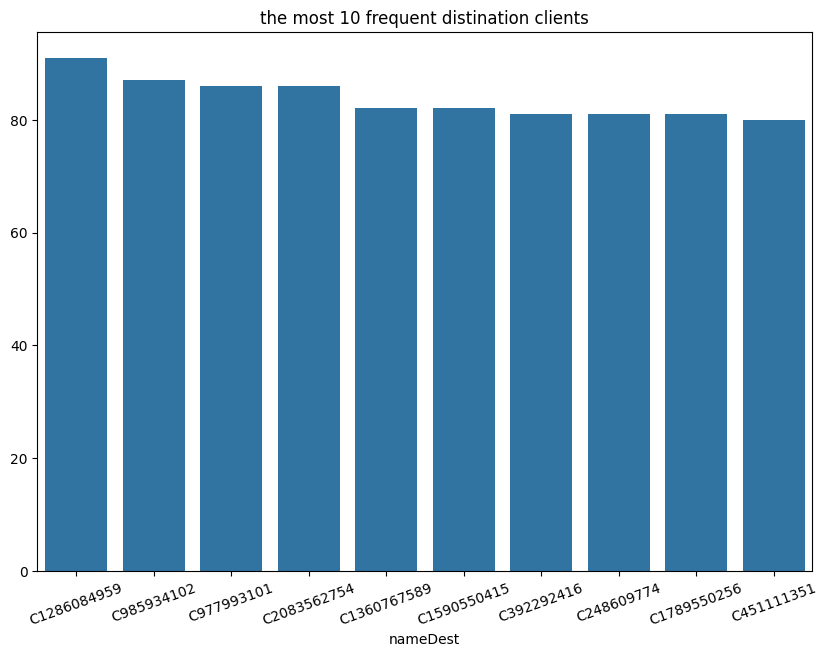

In [74]:
plt.figure(figsize = [10, 7])
sb.barplot(x = data['nameDest'].value_counts()[:n].index, y = data['nameDest'].value_counts()[:n].values)
plt.xticks(rotation = 20)
plt.title('the most 10 frequent distination clients')
plt.show()

and here we can say there's an fraud detection because some distination clients like the first one which has 92 transaction some thing may be wrong here and so on

for the distination client id C1286084959 let's see the largest amount of money transfer and is fraud or not

In [75]:
data[data.nameDest == 'C1286084959']

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
367,1,TRANSFER,176334.26,169880779,45136.00,0.00,C1286084959,1251626.46,2107778.11,0,0,45136.00
388,1,CASH_OUT,373068.26,1047934137,20034.00,0.00,C1286084959,1427960.73,2107778.11,0,0,20034.00
471,1,CASH_IN,403418.39,848097505,3834666.95,4238085.34,C1286084959,1801028.99,2107778.11,0,0,-403418.39
642,1,CASH_IN,222126.95,870322840,6688712.64,6910839.59,C1286084959,1397610.60,2107778.11,0,0,-222126.95
659,1,CASH_IN,317393.38,1197721383,8906617.38,9224010.75,C1286084959,1175483.65,2107778.11,0,0,-317393.37
...,...,...,...,...,...,...,...,...,...,...,...,...
4810092,346,CASH_OUT,84205.39,86576996,0.00,0.00,C1286084959,61680519.75,61764725.14,0,0,0.00
4832993,347,CASH_OUT,235564.75,1068656420,0.00,0.00,C1286084959,61764725.14,62000289.89,0,0,0.00
5566959,393,CASH_IN,119568.31,1878371174,8348248.96,8467817.28,C1286084959,62000289.89,61880721.58,0,0,-119568.32
5596560,394,CASH_OUT,381887.53,1789981744,50447.00,0.00,C1286084959,61880721.58,62262609.11,0,0,50447.00


In [76]:
totti = data[data.nameDest == 'C1286084959']
totti.describe()

,step,amount,client_id,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
count,91.000000,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.0,91.0,91.000000
mean,50.714286,206309.763297,1.002663e+09,1.892348e+06,1.953412e+06,1.362347e+07,1.437131e+07,0.0,0.0,-61064.217582
std,103.593145,132179.220078,6.406173e+08,2.819321e+06,2.907859e+06,1.564074e+07,1.545007e+07,0.0,0.0,140952.576098
min,1.000000,2373.110000,1.311740e+07,0.000000e+00,0.000000e+00,8.580903e+05,1.378570e+06,0.0,0.0,-425052.420000
25%,2.500000,98940.590000,5.029396e+08,0.000000e+00,0.000000e+00,2.584442e+06,2.107778e+06,0.0,0.0,-132708.380000
50%,8.000000,189251.840000,9.600608e+08,5.819826e+04,0.000000e+00,1.162832e+07,1.295976e+07,0.0,0.0,0.000000
75%,17.500000,288275.840000,1.641864e+09,3.664394e+06,3.997775e+06,1.874441e+07,1.889081e+07,0.0,0.0,0.000000
max,401.000000,483544.300000,2.112648e+09,1.092285e+07,1.104356e+07,6.226261e+07,6.245186e+07,0.0,0.0,274115.550000


In [77]:
6.245186e+07

62451860.0

In [78]:
totti[totti.newbalanceDest == totti.newbalanceDest.max()]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
5792331,401,CASH_OUT,189251.84,1256632176,22224.0,0.0,C1286084959,62262609.11,62451860.94,0,0,22224.0


In [79]:
totti[(totti.isFraud == 1) | (totti.isFlaggedFraud == 1)]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff


great in spite of that the client frequent about 92 times but it hasn't any fraud transaction

let's see the most frequent distination client with fraud transaction cases

In [80]:
data[data.isFraud == 1]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2,1,TRANSFER,181.00,1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00
251,1,TRANSFER,2806.00,1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,2806.00
252,1,CASH_OUT,2806.00,2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,2806.00
680,1,TRANSFER,20128.00,137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,20128.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0,258355.42
6362610,742,TRANSFER,63416.99,778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0,63416.99
6362611,742,CASH_OUT,63416.99,994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,63416.99
6362614,743,TRANSFER,339682.13,2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,339682.13


In [81]:
data[data.isFlaggedFraud == 1]

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
6205439,586,TRANSFER,353874.22,1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,0.0
6281484,646,TRANSFER,399045.08,724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1,0.0


In [82]:
# get top 10 most frequent fraud distination clients
x = data[data.isFraud == 1]
n = 10
Ramos = x['nameDest'].value_counts()[:n]
Ramos

nameDest
C1325541393    2
C505532836     2
C410033330     2
C935310781     2
C200064275     2
C475338087     2
C1148781766    2
C1656842502    2
C1460854172    2
C686334805     2
Name: count, dtype: int64

In [83]:
for i in Ramos.index:
    if i in data['nameDest'].value_counts()[:n].index:
        print(i)

we notice that the most frequent distination clients not motch to the most frequent fraud transaction process

removes the characters from the distination client id and rename it

In [84]:
data.nameDest = data.nameDest.replace('C','')
data.nameDest = data.nameDest.replace('M','')
data.rename(columns = {'nameDest' : 'distination_client_id'}, inplace = True)

data preprocessing

In [85]:
data.isFraud.value_counts()

isFraud
0    6020184
1       4359
Name: count, dtype: int64

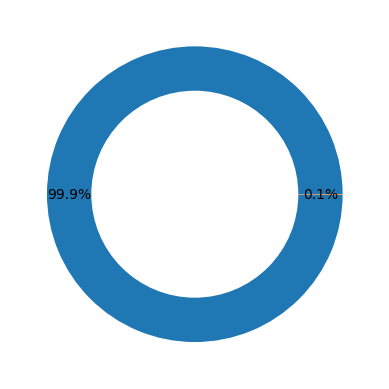

In [86]:
plt.pie(data.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

the fradud data is very very small fraud cases about 0.1% so to avoid any missclassifications we will balance the dataset

In [87]:
# class count
class_count_0, class_count_1 = data['isFraud'].value_counts()

# Separate class
class_0 = data[data['isFraud'] == 0]
class_1 = data[data['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6020184, 12)
class 1: (4359, 12)


total class of 1 and0: isFraud
0    4359
1    4359
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='isFraud'>

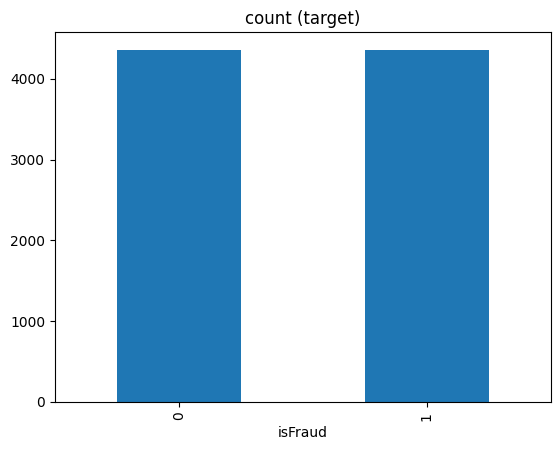

In [88]:
class_0_under = class_0.sample(class_count_1)

balancing_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balancing_data['isFraud'].value_counts())# plot the count after under-sampeling
balancing_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

double Bam let's continue

In [89]:
balancing_data

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
2576818,207,CASH_OUT,99728.72,1487936278,0.00,0.00,C578069578,129335.71,229064.43,0,0,0.00
3182230,239,PAYMENT,296.55,278023486,15091.00,14794.45,M1291031404,0.00,0.00,0,0,296.55
2296969,187,CASH_IN,261484.79,998128530,52.00,261536.79,C772070337,1751571.00,1490086.21,0,0,-261484.79
4949303,351,CASH_OUT,206320.09,463960489,3256.00,0.00,C1522762037,26715.65,233035.74,0,0,3256.00
1260607,134,CASH_OUT,305545.90,2009095631,0.00,0.00,C626055936,1527745.54,1833291.44,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0,258355.42
6362610,742,TRANSFER,63416.99,778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0,63416.99
6362611,742,CASH_OUT,63416.99,994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0,63416.99
6362614,743,TRANSFER,339682.13,2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,339682.13


In [90]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8718 entries, 2576818 to 6362615
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   step                   8718 non-null   int64  
 1   type                   8718 non-null   object 
 2   amount                 8718 non-null   float64
 3   client_id              8718 non-null   int32  
 4   oldbalanceOrg          8718 non-null   float64
 5   newbalanceOrig         8718 non-null   float64
 6   distination_client_id  8718 non-null   object 
 7   oldbalanceDest         8718 non-null   float64
 8   newbalanceDest         8718 non-null   float64
 9   isFraud                8718 non-null   int64  
 10  isFlaggedFraud         8718 non-null   int64  
 11  balance_diff           8718 non-null   float64
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 851.4+ KB


In [91]:
balancing_data.type.unique()

array(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
      dtype=object)

to include the type into our algorithm we need to mapping it

In [92]:
balancing_data["type"] = balancing_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [93]:
balancing_data.type.dtype

dtype('int64')

let's making our X and y variables and split the data into train-test split

In [94]:
balancing_data.columns

Index(['step', 'type', 'amount', 'client_id', 'oldbalanceOrg',
       'newbalanceOrig', 'distination_client_id', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_diff'],
      dtype='object')

In [95]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values

In [96]:
X

array([[ 1.0000000e+00,  9.9728720e+04,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00],
       [ 2.0000000e+00,  2.9655000e+02,  1.5091000e+04,  1.4794450e+04,
         2.9655000e+02],
       [ 3.0000000e+00,  2.6148479e+05,  5.2000000e+01,  2.6153679e+05,
        -2.6148479e+05],
       ...,
       [ 1.0000000e+00,  6.3416990e+04,  6.3416990e+04,  0.0000000e+00,
         6.3416990e+04],
       [ 4.0000000e+00,  3.3968213e+05,  3.3968213e+05,  0.0000000e+00,
         3.3968213e+05],
       [ 1.0000000e+00,  3.3968213e+05,  3.3968213e+05,  0.0000000e+00,
         3.3968213e+05]])

In [97]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

splitting the data

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
X_train.shape,X_test.shape

((6974, 5), (1744, 5))

Let's Encoding the data

In [100]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.22540866e+00 1.42942900e+05 5.34185909e+05 4.58554584e+05
 7.56313249e+04]


In [101]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

Building the Algorithm and Fitting the data

In [104]:
 pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.0/150.0 MB 2.6 MB/s eta 0:00:57
   ---------------------------------------- 1.6/150.0 MB 2.5 MB/s eta 0:00:59
    --------------------------------------- 2.1/150.0 MB 2.4 MB/s eta 0:01:01
    --------------------------------------- 2.4/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 2.6/150.0 MB 2.2 MB/s eta 0:01:08
    --------------------------------------- 2.9/150.0 MB 1.9 MB/s eta 0:01:19
    --------------------------------------- 2.9/150.0 MB 1.9 MB/s eta 0:01:19
    --------------------------------------- 3.1/150.0 MB 1.7 MB/s eta 0:01:27
    --------------------------------------- 3.4/150.0 MB 1.5 MB/s eta 0:01:35
    --------------------------------------- 3.7/150.0 MB 1.5 MB/s eta 0:01:40
    --------------------------------------- 3.7/150.0 MB 1.5 MB/s eta 

In [106]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [107]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.9215658158875825
Testing Accuracy: 0.9157110091743119
Testing Confusion Matrix: 
[[837  40]
 [107 760]]


C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_l

Recall Score :  0.9157110091743119
Precision Score :  0.9157110091743119
Testing F-1: 0.9157110091743119
Testing F-Beta: 0.9157110091743119
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9816461141382277
Testing Accuracy: 0.9810779816513762
Testing Confusion Matrix: 
[[848  29]
 [  4 863]]
Recall Score :  0.9810779816513762
Precision Score :  0.9810779816513762
Testing F-1: 0.9810779816513762
Testing F-Beta: 0.9810779816513762
------------------------------
Training Model DT 
--------------


C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_l

Training Accuracy: 1.0
Testing Accuracy: 0.9913990825688074
Testing Confusion Matrix: 
[[869   8]
 [  7 860]]
Recall Score :  0.9913990825688074
Precision Score :  0.9913990825688074
Testing F-1: 0.9913990825688074
Testing F-Beta: 0.9913990825688074
------------------------------
Training Model RF 
--------------


C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_l

Training Accuracy: 1.0
Testing Accuracy: 0.9919724770642202
Testing Confusion Matrix: 
[[868   9]
 [  5 862]]
Recall Score :  0.9919724770642202
Precision Score :  0.9919724770642202
Testing F-1: 0.9919724770642202
Testing F-Beta: 0.9919724770642202
------------------------------
Training Model XGB 
--------------


C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_l

Training Accuracy: 0.9965586464009177
Testing Accuracy: 0.9948394495412844
Testing Confusion Matrix: 
[[873   4]
 [  5 862]]
Recall Score :  0.9948394495412844
Precision Score :  0.9948394495412844
Testing F-1: 0.9948394495412844
Testing F-Beta: 0.9948394495412844
------------------------------
Training Model Naive Bayes 
--------------
Training Accuracy: 0.5748494407800402
Testing Accuracy: 0.5728211009174312
Testing Confusion Matrix: 
[[132 745]
 [  0 867]]
Recall Score :  0.5728211009174312
Precision Score :  0.5728211009174312
Testing F-1: 0.5728211009174312
Testing F-Beta: 0.5728211009174312
------------------------------
Training Model SVC 
--------------


C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_l

Training Accuracy: 0.950673931746487
Testing Accuracy: 0.948394495412844
Testing Confusion Matrix: 
[[791  86]
 [  4 863]]
Recall Score :  0.948394495412844
Precision Score :  0.948394495412844
Testing F-1: 0.948394495412844
Testing F-Beta: 0.948394495412844
------------------------------


C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\INDU\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_l

as we see the XGBoost is the best algorithm with :
* accuracy : 99%
* F1 score : 99%

In [108]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [109]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [110]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.48%


In [111]:
rounded_y = np.round(y_pred)
unique_val = pd.DataFrame(y_test)
unique_val[0].unique()

array([1, 0], dtype=int64)

the multiple confusion matrix

In [112]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = unique_val[0].unique()
mcm = multilabel_confusion_matrix(y_test, y_pred, labels = y_unique)
mcm

array([[[873,   4],
        [  5, 862]],

       [[862,   5],
        [  4, 873]]], dtype=int64)

In [113]:
data.head()

,step,type,amount,client_id,oldbalanceOrg,newbalanceOrig,distination_client_id,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14


In [114]:
if  model.predict([[2,9839.64,170136.0,160296.36,9839.64]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')



not Fraud
